In [40]:
#Arrays
import numpy as np
# Data Frames
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import pylab
from statsmodels.graphics.regressionplots import *
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from tpot import TPOTRegressor
import calendar

In [2]:
#Reading csv file
data = pd.read_csv('data.csv')
data.head()

,date,TotalConsmp,R1,H_1,R2,H_2,R3,H_3,R4,H_4,...,H_7,R8,H_8,R9,H_9,TempOutSide,Press_mm_hg,H_OutSide,Windspeed,Visibility
0,1/11/2016 17:00,90,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,41.626667,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000
1,1/11/2016 17:10,90,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,41.560000,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667
2,1/11/2016 17:20,80,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,41.433333,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333
3,1/11/2016 17:30,90,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,41.290000,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000
4,1/11/2016 17:40,100,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,41.230000,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667


In [3]:
data.tail()

,date,TotalConsmp,R1,H_1,R2,H_2,R3,H_3,R4,H_4,...,H_7,R8,H_8,R9,H_9,TempOutSide,Press_mm_hg,H_OutSide,Windspeed,Visibility
19730,5/27/2016 17:20,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,...,44.500000,24.7000,50.07400,23.2,46.7900,22.7,755.2,55.666667,3.333333,23.666667
19731,5/27/2016 17:30,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,...,44.414286,24.7000,49.79000,23.2,46.7900,22.6,755.2,56.000000,3.500000,24.500000
19732,5/27/2016 17:40,280,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,...,44.400000,24.7000,49.66000,23.2,46.7900,22.5,755.2,56.333333,3.666667,25.333333
19733,5/27/2016 17:50,430,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,...,44.295714,24.6625,49.51875,23.2,46.8175,22.3,755.2,56.666667,3.833333,26.166667
19734,5/27/2016 18:00,440,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,...,44.054000,24.7360,49.73600,23.2,46.8450,22.2,755.2,57.000000,4.000000,27.000000


In [4]:
data.shape

(19735, 25)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 25 columns):
date           19735 non-null object
TotalConsmp    19735 non-null int64
R1             19735 non-null float64
H_1            19735 non-null float64
R2             19735 non-null float64
H_2            19735 non-null float64
R3             19735 non-null float64
H_3            19735 non-null float64
R4             19735 non-null float64
H_4            19735 non-null float64
R5             19735 non-null float64
H_5            19735 non-null float64
R6             19735 non-null float64
H_6            19735 non-null float64
R7             19735 non-null float64
H_7            19735 non-null float64
R8             19735 non-null float64
H_8            19735 non-null float64
R9             19735 non-null float64
H_9            19735 non-null float64
TempOutSide    19735 non-null float64
Press_mm_hg    19735 non-null float64
H_OutSide      19735 non-null float64
Windspeed      19735

There's no missing data. That's good. 
We have 19735 samples which also looks pretty, but all the samples are belonging to first 5 months of year 2016.

Initially, I'll assume no seasonal effect (but I feel like there is) and try to find a linear relation between the predictors and the target value (energy consumption amount)

In [6]:
# Type of date column is object. I'll convert it to datetime to use it more comfortable 
data['date'] = pd.to_datetime(data['date'])

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TotalConsmp,19735.0,101.496833,104.380829,10.000000,50.000000,60.000000,100.000000,1110.000000
R1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
H_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
R2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
H_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
R3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
H_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
R4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
H_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000
R5,19735.0,19.592106,1.844623,15.330000,18.277500,19.390000,20.619643,25.795000


In [8]:
data.isnull().sum()

date           0
TotalConsmp    0
R1             0
H_1            0
R2             0
H_2            0
R3             0
H_3            0
R4             0
H_4            0
R5             0
H_5            0
R6             0
H_6            0
R7             0
H_7            0
R8             0
H_8            0
R9             0
H_9            0
TempOutSide    0
Press_mm_hg    0
H_OutSide      0
Windspeed      0
Visibility     0
dtype: int64

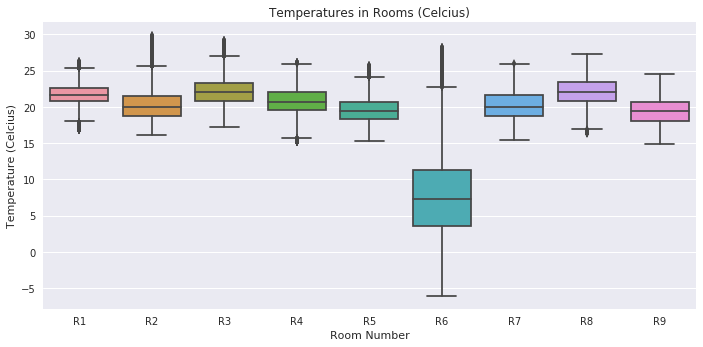

In [9]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=data[['R1', 'R2','R3', 'R4','R5','R6','R7','R8','R9']])
plt.title('Temperatures in Rooms (Celcius)')
plt.xlabel('Room Number')
plt.ylabel('Temperature (Celcius)');

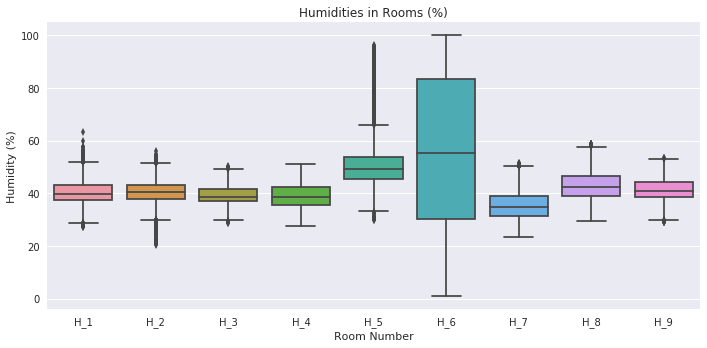

In [10]:
sns.boxplot(data=data[['H_1','H_2','H_3','H_4','H_5','H_6','H_7','H_8','H_9']])
plt.title('Humidities in Rooms (%)')
plt.xlabel('Room Number')
plt.ylabel('Humidity (%)');

It's obvious that there's a problem with Room 6. It's very cold and humid. But it doesn't mean should be ignored. For example; this room has a terrible isolation and AC is running all the time-which means a big energy consumer.


I want to make a deep dive on Room 5 (because of humidity) and Room 2 (because of temperature) as well. 

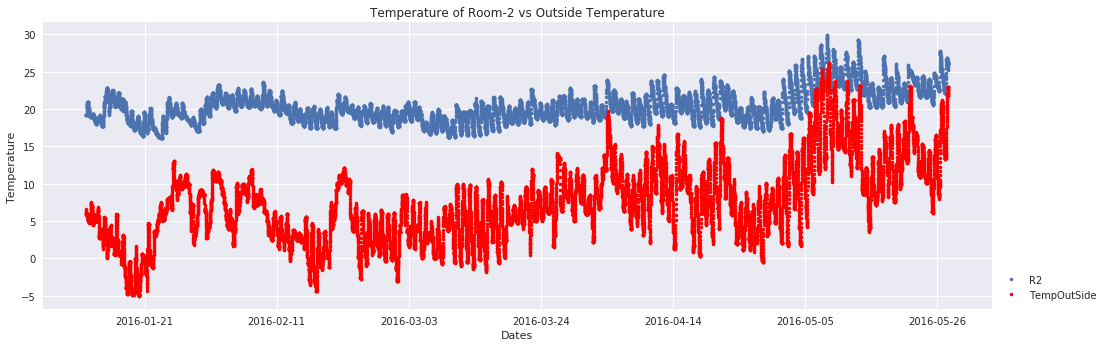

In [11]:
sns.set(rc={'figure.figsize':(17,5.27)})
plt.plot(data['date'], data['R2'], marker='.', linestyle='none');
plt.plot(data['date'], data['TempOutSide'], color='red', marker='.', linestyle='none')
plt.title('Temperature of Room-2 vs Outside Temperature')
plt.xlabel('Dates')
plt.ylabel('Temperature')
plt.legend(loc=4 , bbox_to_anchor=(1.12, 0));


It looks normal. Especially on cold days, the room temperature is aroung 20. Temperature increases around May 10th looks like because of outside temperature. And the difference comparing other rooms might be because of location of the room or some other reason.

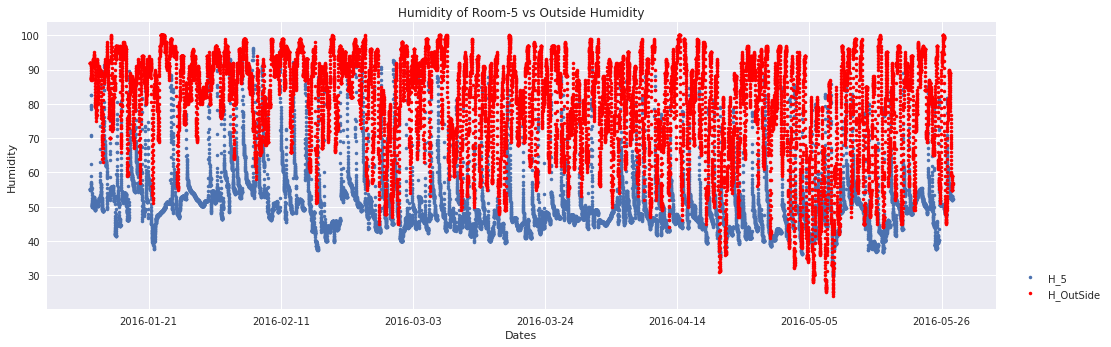

In [12]:
plt.plot(data['date'], data['H_5'], marker='.', linestyle='none')
plt.plot(data['date'], data['H_OutSide'], color='red', marker='.', linestyle='none')
plt.title('Humidity of Room-5 vs Outside Humidity')
plt.xlabel('Dates')
plt.ylabel('Humidity')
plt.legend(loc=4 , bbox_to_anchor=(1.12, 0));

Aside from room # 6; room # 5 is the most humid room. And looks like the coldest one as well (more or less the same with room # 9).
But the spread of humidity values looks pretty normal. Similar to room # 2, I believe, this difference might be bacuse of the location or some other effect (No sun light, having water connection hubs or leakages inside, etc.). 

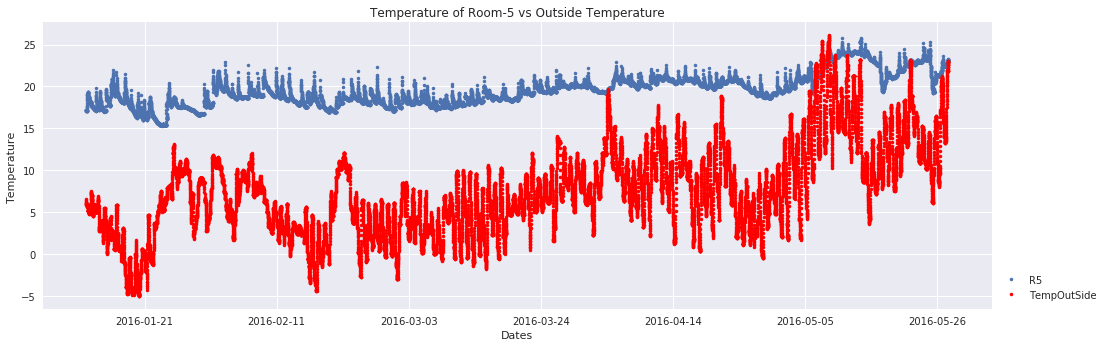

In [13]:
plt.plot(data['date'], data['R5'], marker='.', linestyle='none');
plt.plot(data['date'], data['TempOutSide'], color='red', marker='.', linestyle='none')
plt.title('Temperature of Room-5 vs Outside Temperature')
plt.xlabel('Dates')
plt.ylabel('Temperature')

plt.legend(loc=4 , bbox_to_anchor=(1.12, 0));


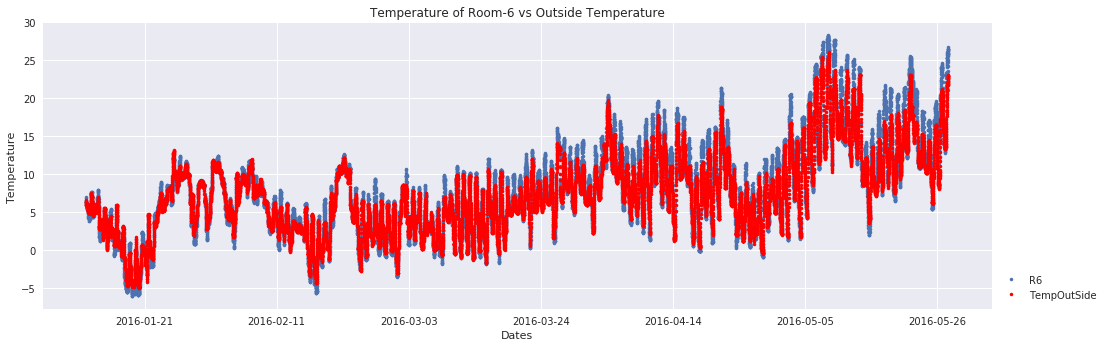

In [14]:
plt.plot(data['date'], data['R6'], marker='.', linestyle='none')
plt.plot(data['date'], data['TempOutSide'], color='red', marker='.', linestyle='none')
plt.title('Temperature of Room-6 vs Outside Temperature')
plt.xlabel('Dates')
plt.ylabel('Temperature')
plt.legend(loc=4 , bbox_to_anchor=(1.12, 0));

OMG! It looks like room # 6 has no walls :)
But again, I don't want to ignore this room (I wish I could) because I feel like I have to make sure if it's consuming energy or not. As I mentioned above, this room might have a terrible isolation with a non-stop running AC.

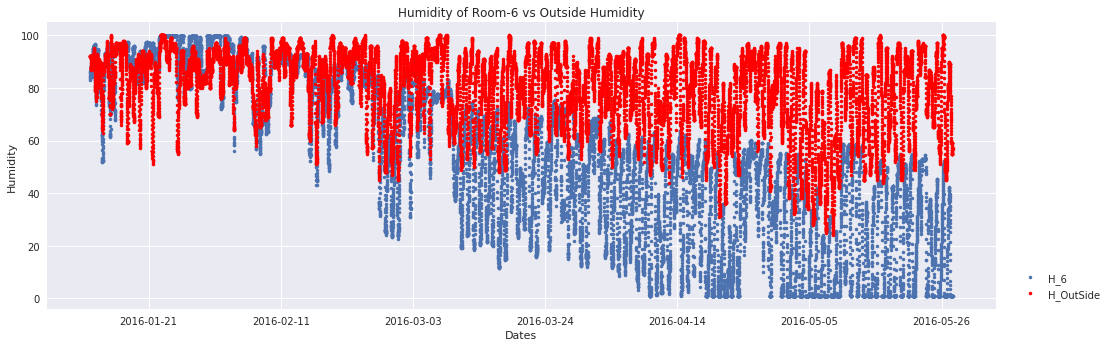

In [15]:
plt.plot(data['date'], data['H_6'], marker='.', linestyle='none')
plt.plot(data['date'], data['H_OutSide'], color='red', marker='.', linestyle='none')
plt.title('Humidity of Room-6 vs Outside Humidity')
plt.xlabel('Dates')
plt.ylabel('Humidity')
plt.legend(loc=4 , bbox_to_anchor=(1.12, 0));

This room makes me nervous.
The humidity difference means that the room has walls but no heating/cooling and can be ignored for energy consumption.
But I wish I could have eyes in the field to make cross-check.

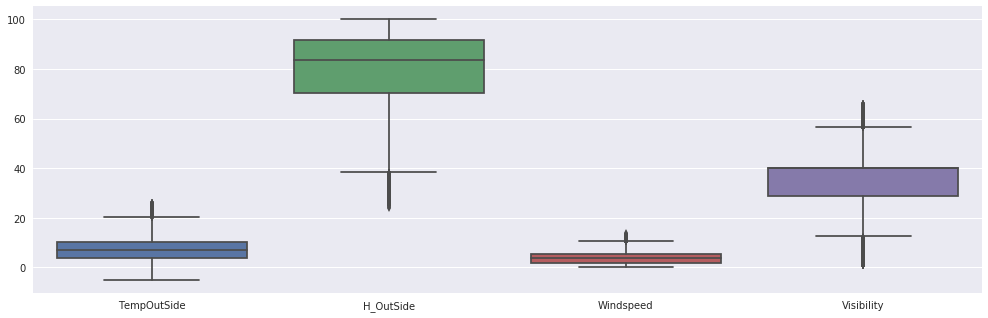

In [16]:
sns.boxplot(data=data[['TempOutSide','H_OutSide','Windspeed','Visibility']]);

I wanted to see the distributions of outside temperature, humidity, wind speed and visibility as well to see if the distributions are normal or have any ouliers needs to be cleaned.

They all look like, they have no outliers.

**Visibility** values doesn't look meaningful to me. While a small object can not be seen from a close distance, a large object can be seen from very far away (ex: skylines, Great Wall of China). If we’re talking about visibility at sea; even with perfect atmospheric conditions and a large object to detect, the range can be more or less 10 miles (around 20 km ). These visibility values reminds me the range of a close range radar :) But in this case, I can’t see any relation between visibility and energy consumption.
Of course, I’m not going to process only with my feelings. I have to use statistics in any case.



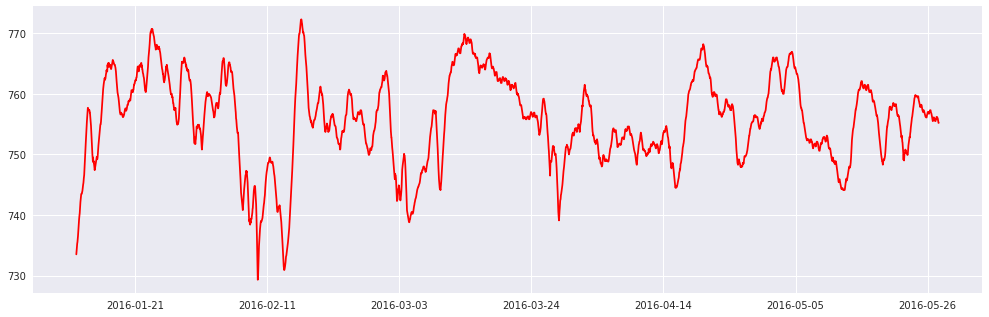

In [17]:
plt.plot(data['date'], data['Press_mm_hg'], color='red');

Standard atmospheric pressure value is 760mm at sea level and this barometer value is a great tool to make predictions about weather. The distribution looks pretty normal with no outlier.

It's obvious that, the features need to be scaled before processed. I don't want atmospheric pressure (around 750) or humidity values to contaminate my poor innocent features.

First, I'll do my own style of scaling just to have an idea about the relationship between the predictor and target values. After that, I'll go on more statistical.

**All the coefficients below are just for visualization purposes and will not be involved to anywhere in the dataset.**

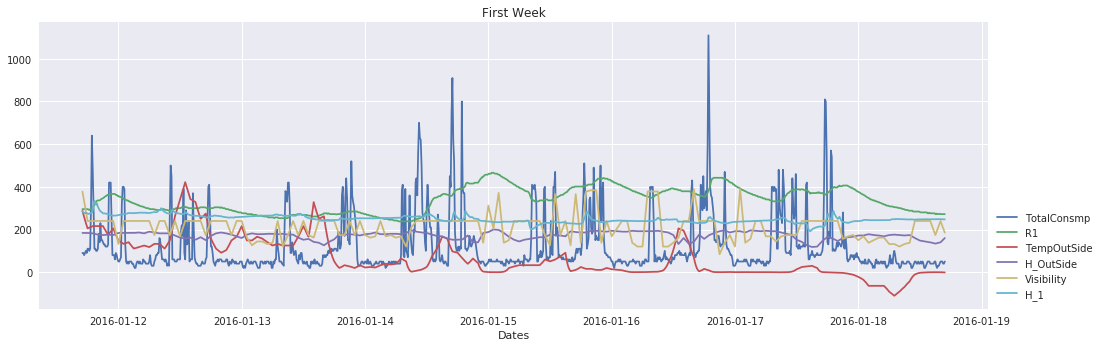

In [18]:
plt.plot(data['date'][:1008],data['TotalConsmp'][:1008])
plt.plot(data['date'][:1008], (data['R1'][:1008])**2-100)
plt.plot(data['date'][:1008], (data['TempOutSide'][:1008])**3)
plt.plot(data['date'][:1008], (data['H_OutSide'][:1008])*2)
plt.plot(data['date'][:1008], (data['Visibility'][:1008])*6)
plt.plot(data['date'][:1008], (data['H_1'][:1008])*6)
plt.title('First Week')
plt.legend(loc=4 , bbox_to_anchor=(1.12, 0))
plt.xlabel('Dates');



In [19]:
data = data.set_index(data['date'])

Now I'll create monthly, weekly and daily subsets of the data.

In [20]:
monthly_data = data.resample('M').sum()

weekly_data = data.resample('W').sum()

daily_data = data.resample('D').sum()

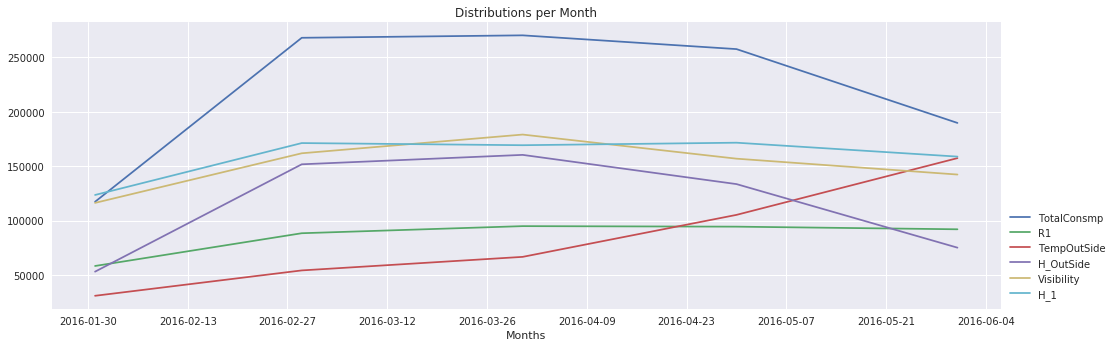

In [21]:
plt.plot(monthly_data['TotalConsmp']-180000)
plt.plot(monthly_data['R1'])
plt.plot((monthly_data['TempOutSide'])**1.1)
plt.plot((monthly_data['H_OutSide'])-200000)
plt.plot((monthly_data['Visibility']))
plt.plot((monthly_data['H_1']))

plt.title('Distributions per Month')
plt.legend(loc=4 , bbox_to_anchor=(1.12, 0))
plt.xlabel('Months')
plt.show();

It looks like there's a significant increase on February but actually there is no increase. Because the data set is starting from the second week of January. 

But we can say there's a decrease in May most probably related to the increase of outside tempreature.

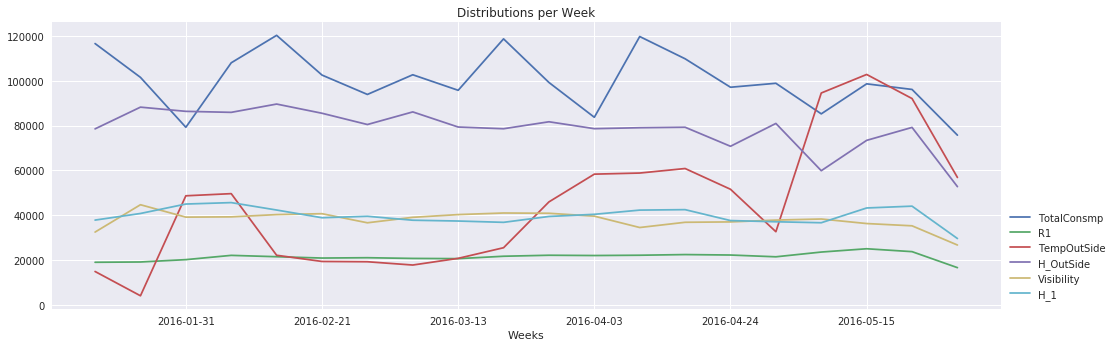

In [22]:
plt.plot(weekly_data['TotalConsmp'])
plt.plot(weekly_data['R1'])
plt.plot((weekly_data['TempOutSide'])**1.2)
plt.plot((weekly_data['H_OutSide']))
plt.plot((weekly_data['Visibility']))
plt.plot((weekly_data['H_1']))
plt.title('Distributions per Week')
plt.legend(loc=4 , bbox_to_anchor=(1.12, 0))
plt.xlabel('Weeks');

It's not easy to make an assumption based on these rough plottings. But it looks like outside temperature is leading the energy consumption. And there's no linear relation (most probably due to seasonal effects (heating&cooling)). There are also some peak and drop down points as well.

Let's see some daily distributions.

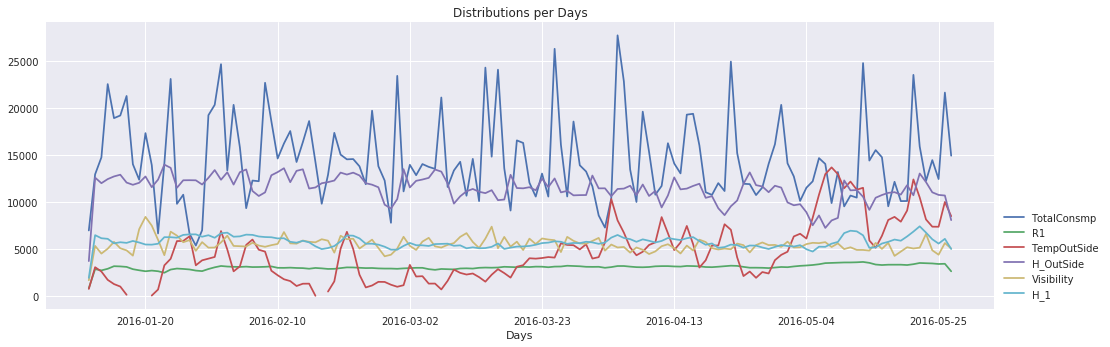

In [23]:
plt.plot(daily_data['TotalConsmp'])
plt.plot(daily_data['R1'])
plt.plot((daily_data['TempOutSide'])**1.2+50)
plt.plot((daily_data['H_OutSide']))
plt.plot((daily_data['Visibility']))
plt.plot((daily_data['H_1']))
plt.title('Distributions per Days')
plt.legend(loc=4 , bbox_to_anchor=(1.12, 0))
plt.xlabel('Days');

Peaks and drop downs are more apparent now. Let's zoom in.

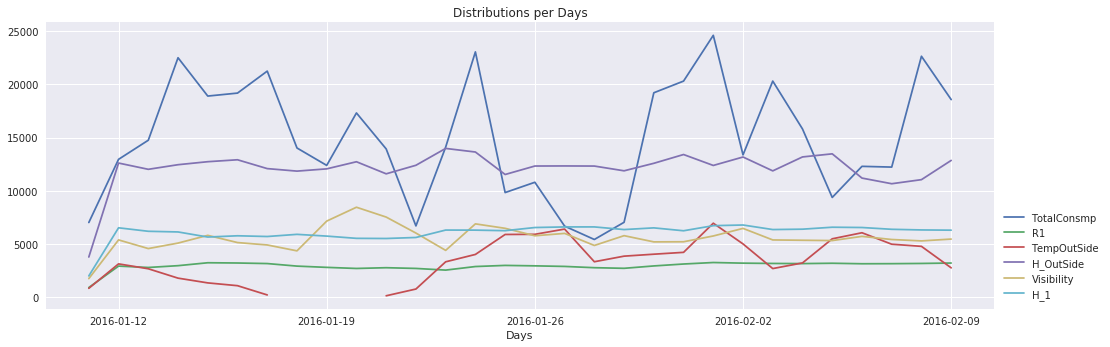

In [24]:
plt.plot(daily_data['TotalConsmp'][:30])
plt.plot(daily_data['R1'][:30])
plt.plot((daily_data['TempOutSide'][:30])**1.2+50)
plt.plot((daily_data['H_OutSide'][:30]))
plt.plot((daily_data['Visibility'][:30]))
plt.plot((daily_data['H_1'][:30]))
plt.title('Distributions per Days')
plt.legend(loc=4 , bbox_to_anchor=(1.12, 0))
plt.xlabel('Days');

In [25]:
data['weekday'] = data.date.apply(lambda x: calendar.day_name[x.date().weekday()])

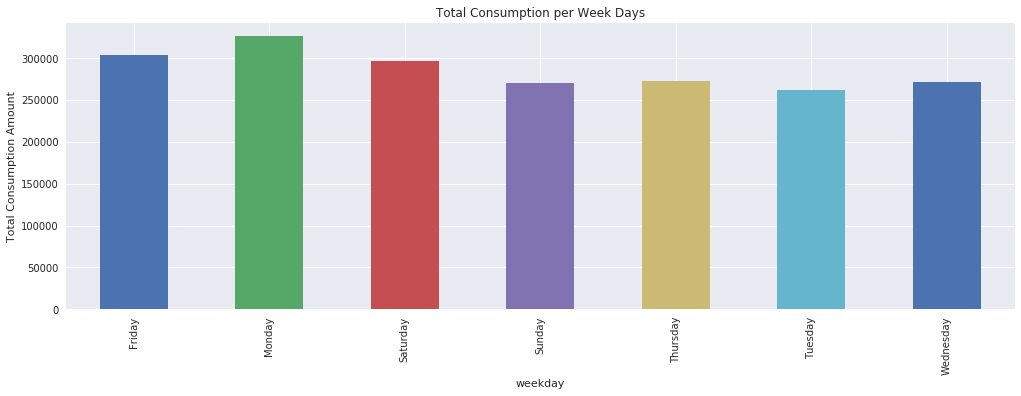

In [26]:
data.groupby('weekday').TotalConsmp.sum().plot(kind='bar')
plt.title('Total Consumption per Week Days')
plt.ylabel('Total Consumption Amount');

In [27]:
data.groupby('weekday').TotalConsmp.sum()

weekday
Friday       303750
Monday       325980
Saturday     296870
Sunday       270710
Thursday     272210
Tuesday      262480
Wednesday    271040
Name: TotalConsmp, dtype: int64

It looks like there's something significant to effect this amount. If we're talking about cruise tours, it reminds me of a common planning detail as the first day of the sails with a lot of energy consumption to arrange rooms conditions as quick as possible.

Let's zoom in more and check some daily consumption amounts.

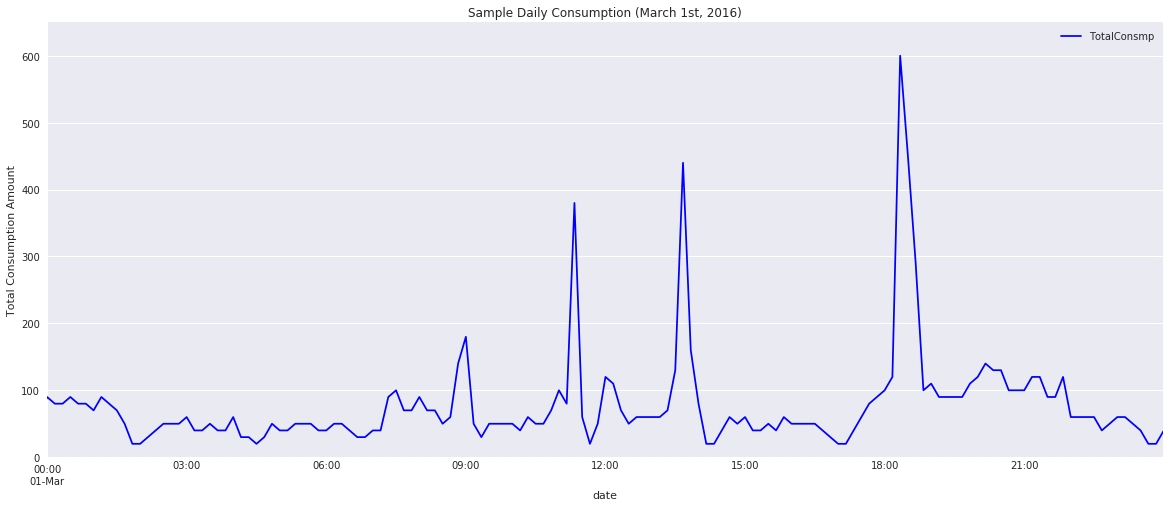

In [28]:
data.TotalConsmp.plot(color='b', style='-', legend=True,figsize=(20,8))
plt.axis(('2016-Mar-01 00:00:00', '2016-Mar-01 23:59:00', 0, 650))
plt.title('Sample Daily Consumption (March 1st, 2016)')
plt.ylabel('Total Consumption Amount');

This plot is very important. On March 1st, the weather is very cold and it looks like energy consumption is mainly on day times. 
So, it means these rooms are being used mostly on day times. 

Now, let's check a warm date's energy consumption distribution.

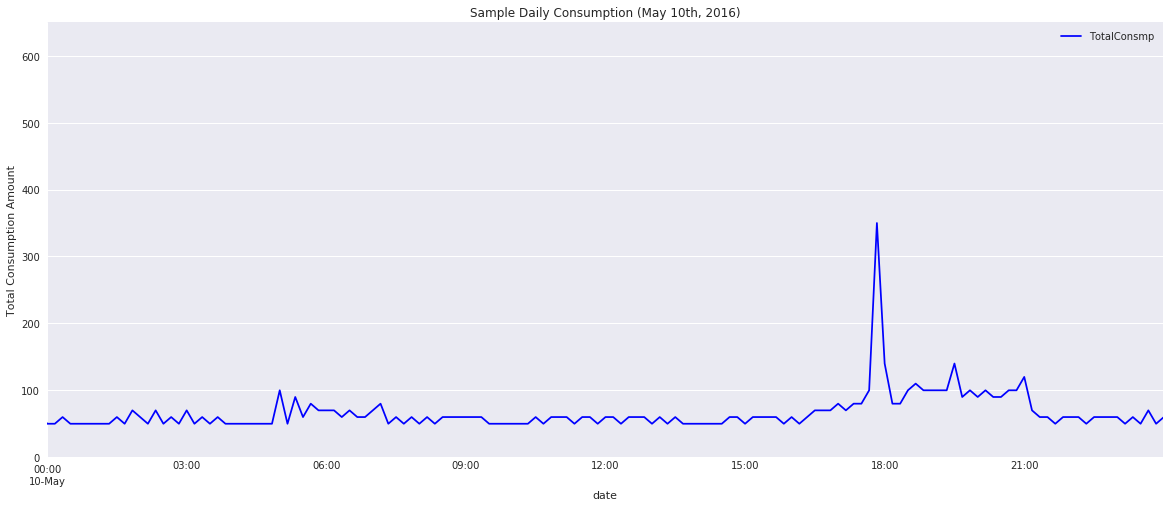

In [29]:
data.TotalConsmp.plot(color='b', style='-', legend=True,figsize=(20,8))
plt.axis(('2016-May-10 00:00:00', '2016-May-10 23:59:00', 0, 650))
plt.title('Sample Daily Consumption (May 10th, 2016)')
plt.ylabel('Total Consumption Amount');

Energy consumption is definitely less on warm dates which means heating might be a factor.

There’s no significant increase after sunset times which means consumption amounts are not related to day light.  

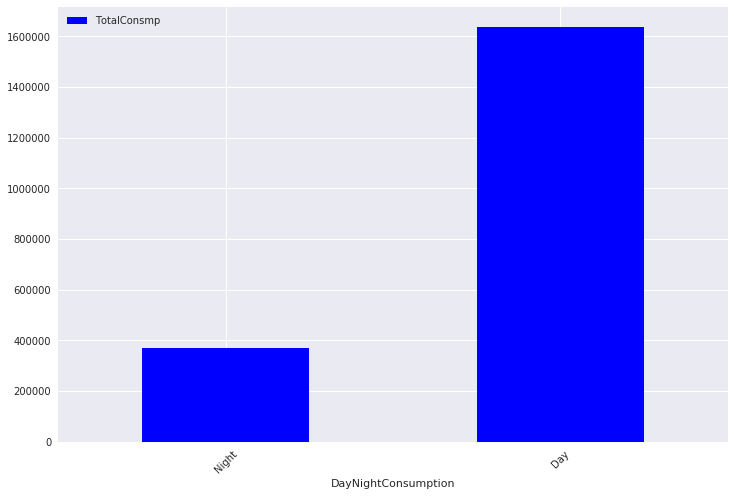

In [30]:
data['DayNightConsumption'] = data.date.apply(lambda x: 0 if ((x.hour < 6) | (x.hour > 21)) else 1)
data.groupby('DayNightConsumption').TotalConsmp.sum().plot(color='b', style='-', legend=True,figsize=(12,8), kind='bar')
_ = plt.xticks([0,1],['Night','Day'], rotation=45)

Energy consumption amounts at nights are definitely much smaller comparing day times.

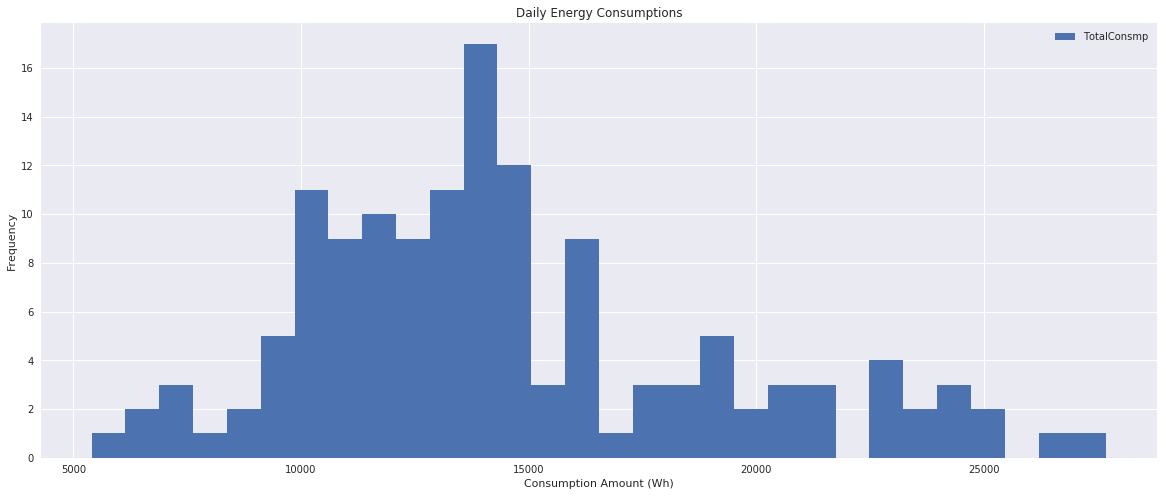

In [31]:
daily_data.plot(y='TotalConsmp',kind='hist',figsize=(20,8),bins=30)
plt.title('Daily Energy Consumptions')
plt.xlabel('Consumption Amount (Wh)');

In [32]:
daily_data.TotalConsmp.value_counts()[:20]

20320    3
12290    2
10790    2
10110    2
14260    2
10590    2
14100    2
14590    1
12380    1
11050    1
23390    1
9110     1
11610    1
12900    1
7000     1
13910    1
14930    1
9900     1
16220    1
9830     1
Name: TotalConsmp, dtype: int64

Daily energy consumption amounts mostly spreading between 10K-15K Wh. 

Now let's use some tools to go on more statistical

In [33]:
# statsmodels works nicely with pandas dataframes
m = ols('TotalConsmp ~ R1 + H_1 + R2 + H_2 + R3 + H_3 + R4 + H_4 + R5 + H_5 + R6 + H_6 + R7 + H_7 + R8 + H_8+ R9 + H_9+TempOutSide+Press_mm_hg+H_OutSide+Windspeed+Visibility', data).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalConsmp   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     155.5
Date:                Mon, 05 Nov 2018   Prob (F-statistic):               0.00
Time:                        07:06:00   Log-Likelihood:            -1.1809e+05
No. Observations:               19735   AIC:                         2.362e+05
Df Residuals:                   19711   BIC:                         2.364e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -98.0371     89.515     -1.095      

Above coefficients and p values are showing that there's no linear relation between the features and the target value.
Let's make it more colorful.

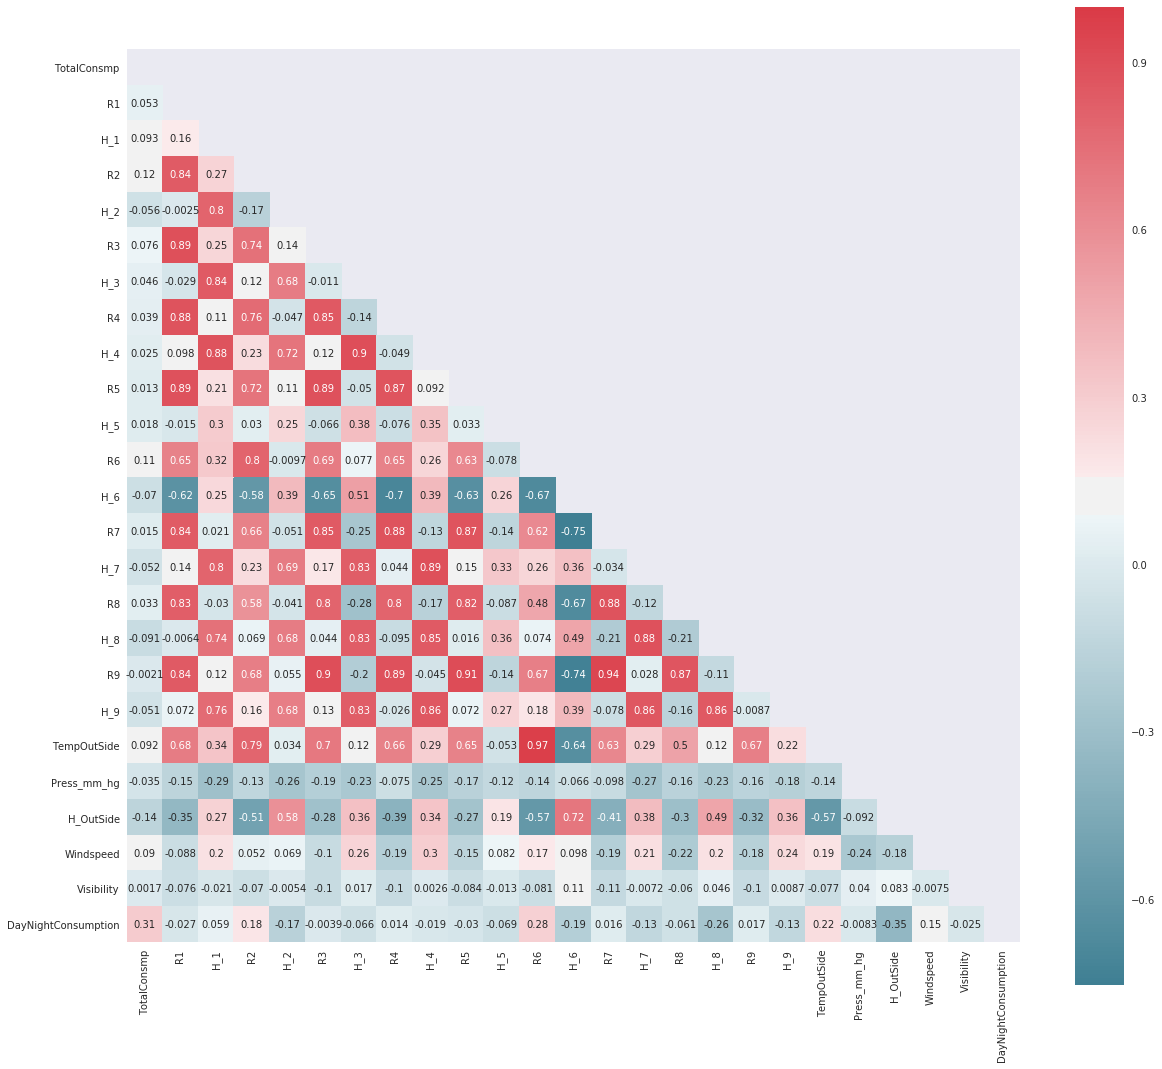

In [34]:
def plot_correlation_map( df ):
    corr = df.corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    _ , ax = plt.subplots( figsize =( 20 , 20 ) )
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr,
        mask=mask, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 10 }
    )
# Draw the heatmap with the mask and correct aspect ratio
plot_correlation_map(data)

It's more easy to evaluate this way. As expected; Windspeed, Visibility and Barometere values have nothing to do with the target variable and can be ignored.

In [35]:
data=data.drop(columns= ['R6','H_6'])

data.columns

Index(['date', 'TotalConsmp', 'R1', 'H_1', 'R2', 'H_2', 'R3', 'H_3', 'R4',
       'H_4', 'R5', 'H_5', 'R7', 'H_7', 'R8', 'H_8', 'R9', 'H_9',
       'TempOutSide', 'Press_mm_hg', 'H_OutSide', 'Windspeed', 'Visibility',
       'weekday', 'DayNightConsumption'],
      dtype='object')

In [36]:
m = ols('TotalConsmp ~ R1 + H_1 + R2 + H_2 + R3 + H_3 + R4 + H_4 + R5 + H_5 + R7 + H_7 + R8 + H_8+ R9 + H_9+TempOutSide+H_OutSide', data).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalConsmp   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     185.0
Date:                Mon, 05 Nov 2018   Prob (F-statistic):               0.00
Time:                        07:06:02   Log-Likelihood:            -1.1819e+05
No. Observations:               19735   AIC:                         2.364e+05
Df Residuals:                   19716   BIC:                         2.366e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      82.9430     17.812      4.657      

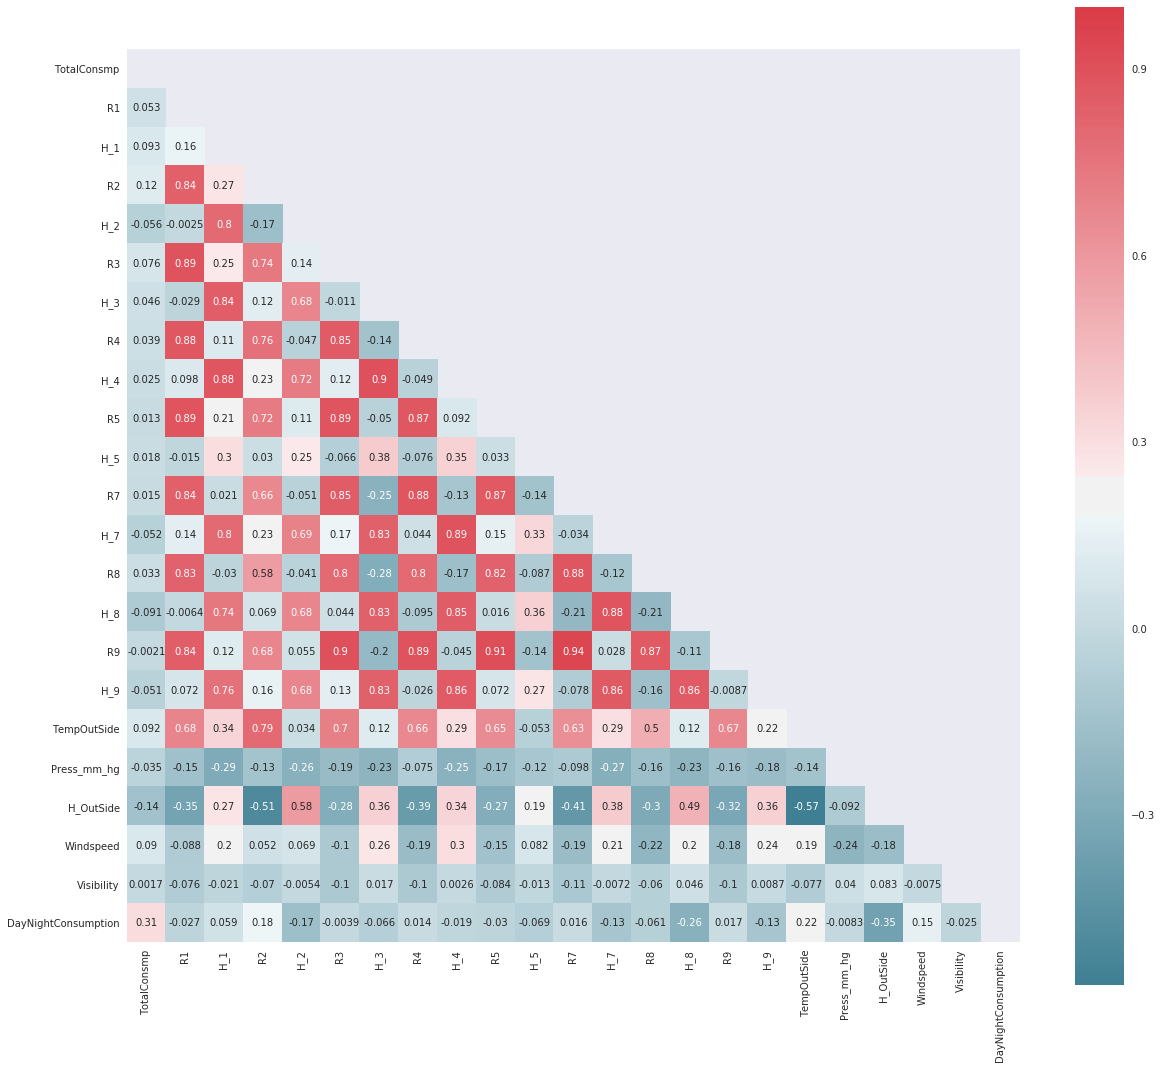

In [41]:
plot_correlation_map(data)

Text(0.5,1,'Fitted vs Residual')

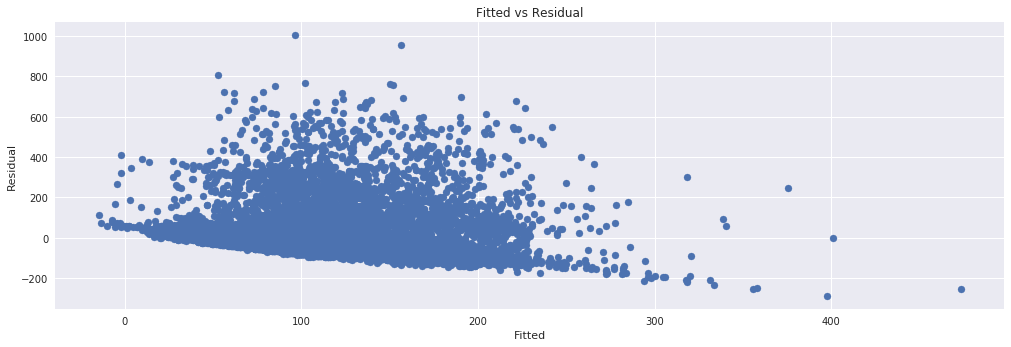

In [42]:
plt.scatter(m.fittedvalues, m.resid)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')

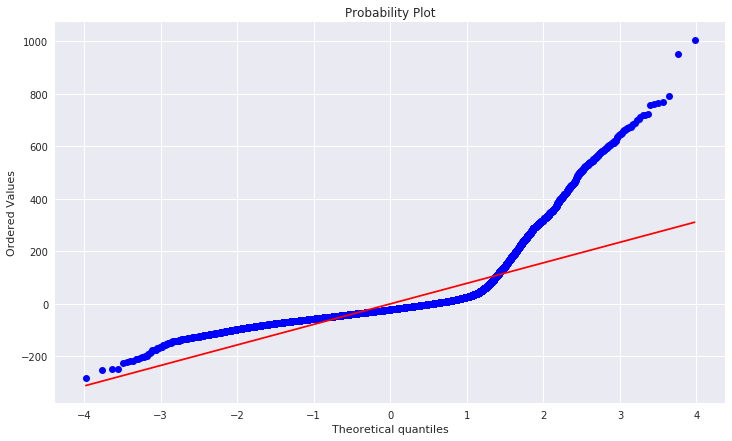

In [109]:
plt.figure(figsize = (12,7))
stats.probplot(m.resid, dist="norm", plot=pylab)
pylab.show()

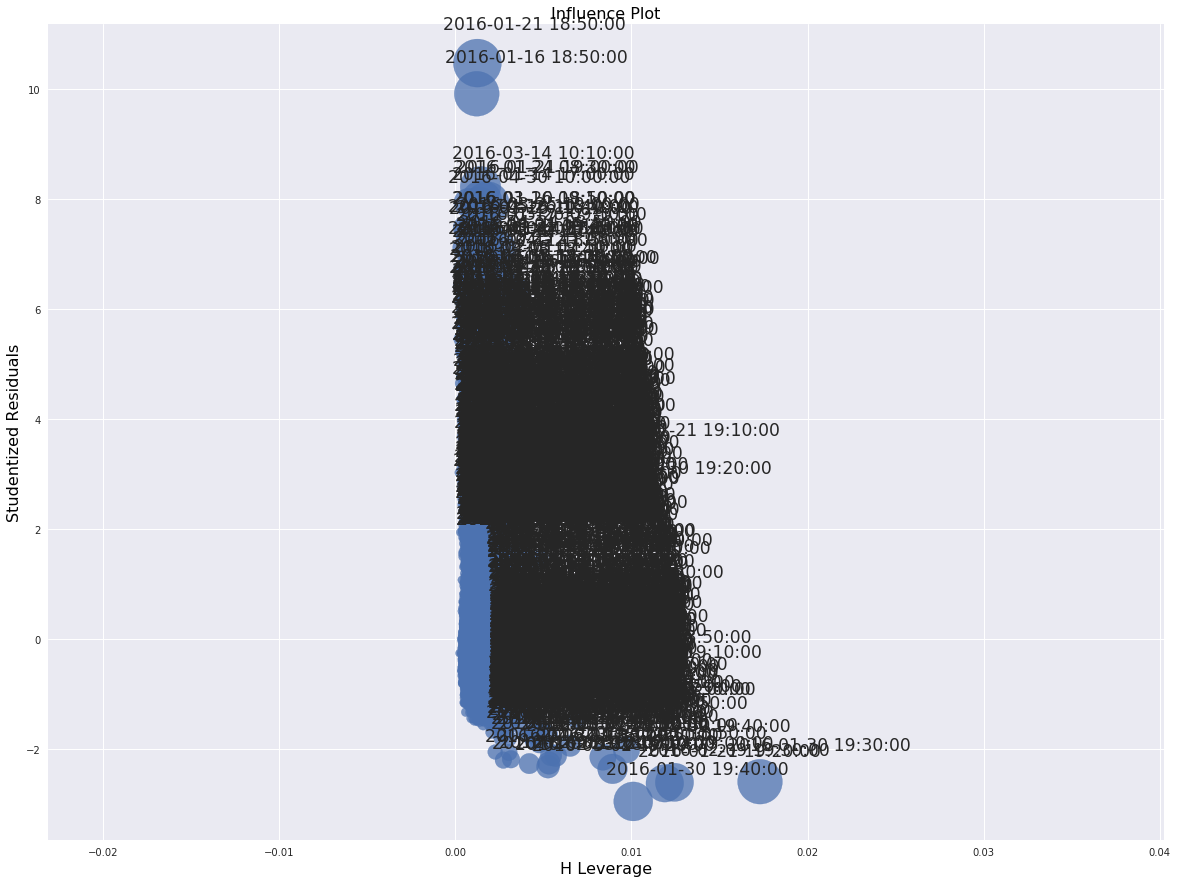

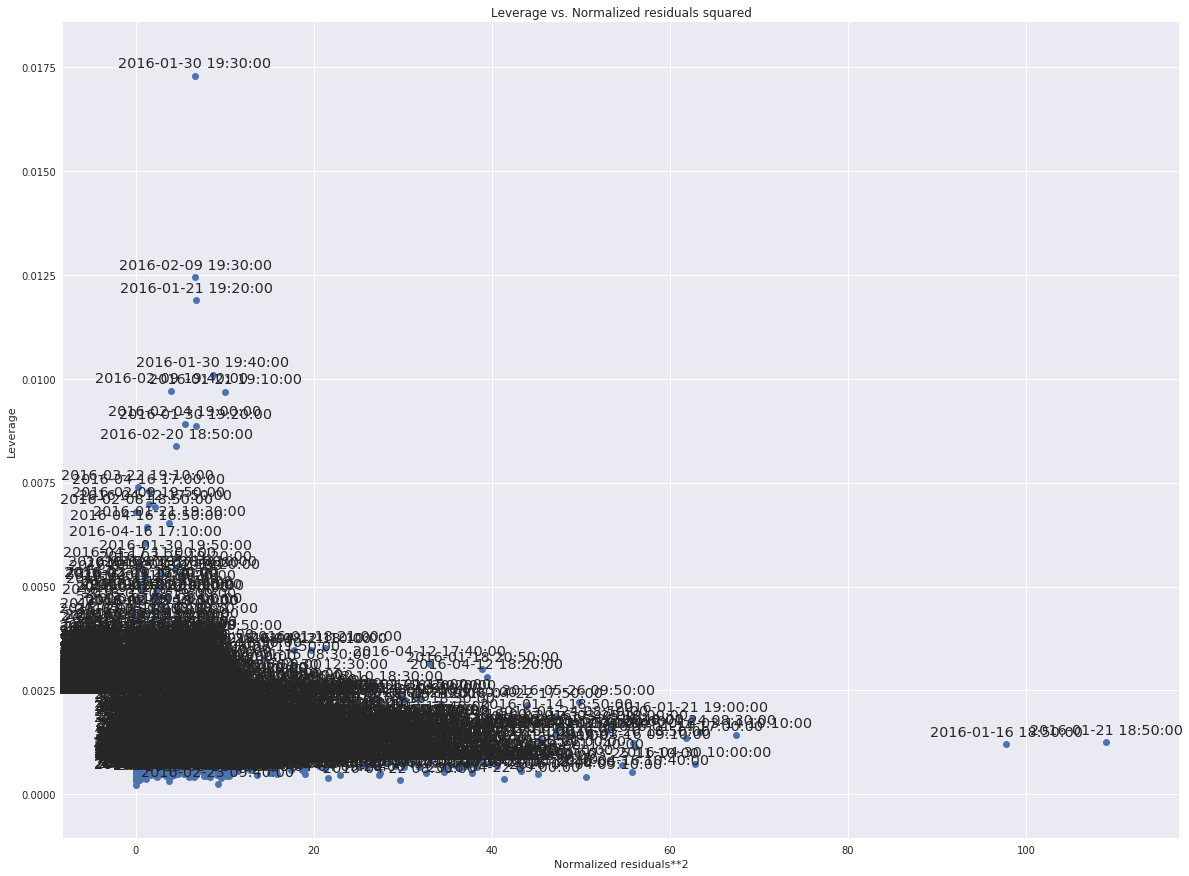

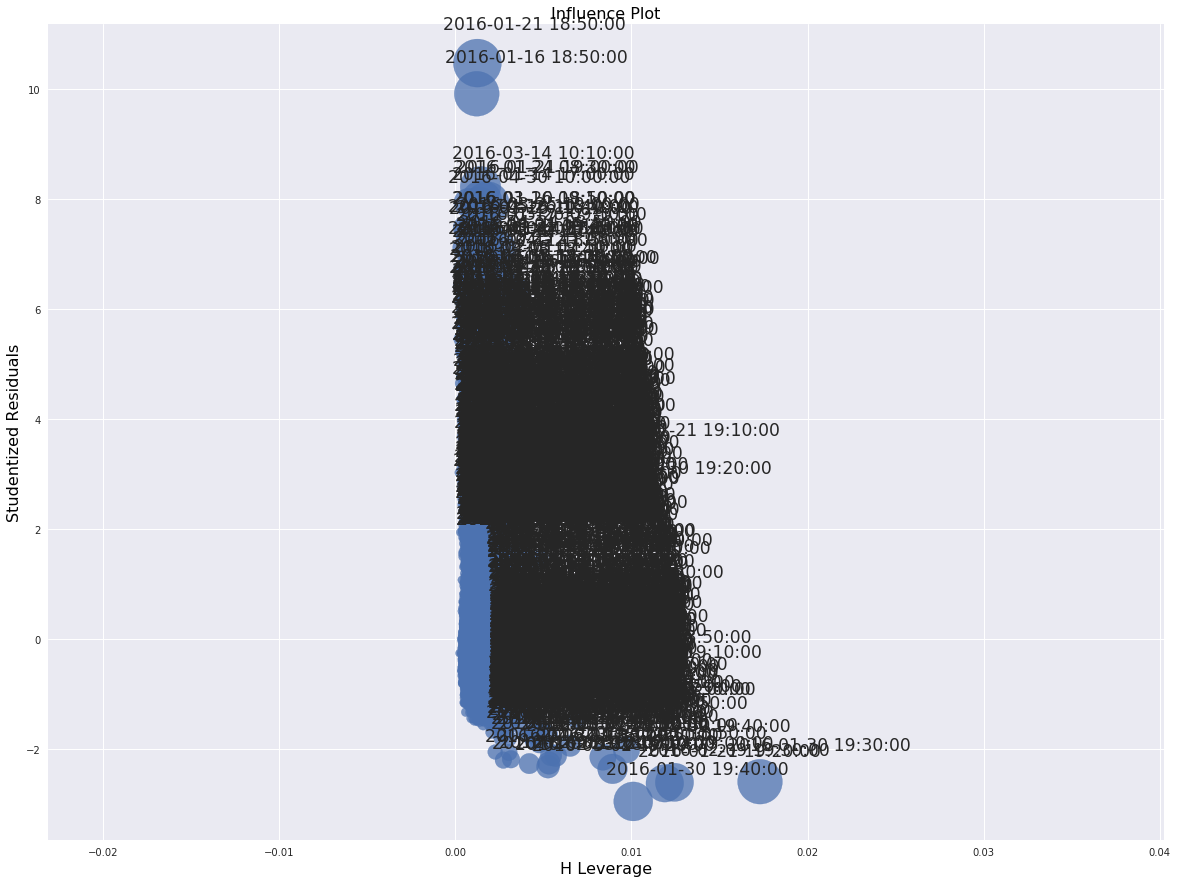

In [110]:
plt.rcParams["figure.figsize"] = (20,15)
plot_leverage_resid2(m)
influence_plot(m, size = 48)

Ignoring Room # 6 didn't make a significant change. There's still no linear relation.

## Splitting the Data

In [37]:
data.columns

Index(['date', 'TotalConsmp', 'R1', 'H_1', 'R2', 'H_2', 'R3', 'H_3', 'R4',
       'H_4', 'R5', 'H_5', 'R7', 'H_7', 'R8', 'H_8', 'R9', 'H_9',
       'TempOutSide', 'Press_mm_hg', 'H_OutSide', 'Windspeed', 'Visibility',
       'weekday', 'DayNightConsumption'],
      dtype='object')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['date','TotalConsmp','Press_mm_hg', 'Windspeed', 'Visibility','weekday','DayNightConsumption'],axis=1), 
                                                    data.TotalConsmp, test_size = 0.2, random_state=42)


## Scaling the Independent Variables

In [39]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Machine Learning Models

In [58]:
lm = LinearRegression()
# Fit the model on the trainng data.
grid = GridSearchCV(estimator=lm, param_grid={}, cv = 5)

grid.fit(X_train, y_train)
print('Best_score of the Grid CV: {}'.format(grid.best_score_))
print ('---------------------------')
print('Best parameters of Linear Regression:', grid.best_params_)
print ('---------------------------')
y_predict = grid.predict(X_test)
print('R-squared score: %.2f' % r2_score(y_test, y_predict))

Best_score of the Grid CV: 0.1411719156918203
---------------------------
Best parameters of Linear Regression: {}
---------------------------
R-squared score: 0.15


In [59]:
cv_res = cross_val_score(lm, X_train, y_train,cv=5)

print(cv_res)

[0.1269645  0.13542441 0.16540543 0.14273917 0.13532471]


In [61]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
print('Train score : {:.3f}'.format(lm.score(X_train, y_train)))
print('Test score: {:.3f}'.format(lm.score(X_test, y_test)))

Train score : 0.144
Test score: 0.147


The scores are terrible as expected.

In [63]:
ridge = Ridge(alpha=.1,normalize=True)

ridge.fit(X_train,y_train)

print('Train score : {:.3f}'.format(ridge.score(X_train, y_train)))
print('Test score: {:.3f}'.format(ridge.score(X_test, y_test)))

Train score : 0.117
Test score: 0.122


In [64]:
lasso = Lasso(alpha=.1,normalize=True)

lasso.fit(X_train,y_train)

print('Train score : {:.3f}'.format(lasso.score(X_train, y_train)))
print('Test score: {:.3f}'.format(lasso.score(X_test, y_test)))

Train score : 0.006
Test score: 0.006


In [65]:
elastic = ElasticNet()

elastic.fit(X_train,y_train)

print('Train score : {:.3f}'.format(elastic.score(X_train, y_train)))
print('Test score: {:.3f}'.format(elastic.score(X_test, y_test)))

Train score : 0.071
Test score: 0.076


As expected, Linear Regression, Ridge, Lasso and Elastic Net are not successful at all.

## Random Forest Regressor

In [131]:
param_grid = {"n_estimators": [50, 200, 500],
            "max_features": [3, 5, 10, 15],
            "min_samples_leaf": [1, 3, 5],
            'random_state': [5]}
model = RandomForestRegressor()
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv = 5)
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

0.5600040275628306
{'max_features': 3, 'min_samples_leaf': 1, 'n_estimators': 500, 'random_state': 5}


In [54]:
RF_reg = RandomForestRegressor(random_state=5, n_estimators=500, max_features=3, 
                                  min_samples_leaf=1)
RF_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=5,
           verbose=0, warm_start=False)

In [55]:
y_pred = RF_reg.predict(X_test)

In [56]:
print('Train score : {:.3f}'.format(RF_reg.score(X_train, y_train)))
print('Test score: {:.3f}'.format(RF_reg.score(X_test, y_test)))

Train score : 0.945
Test score: 0.617


**Actual vs. Predicted**

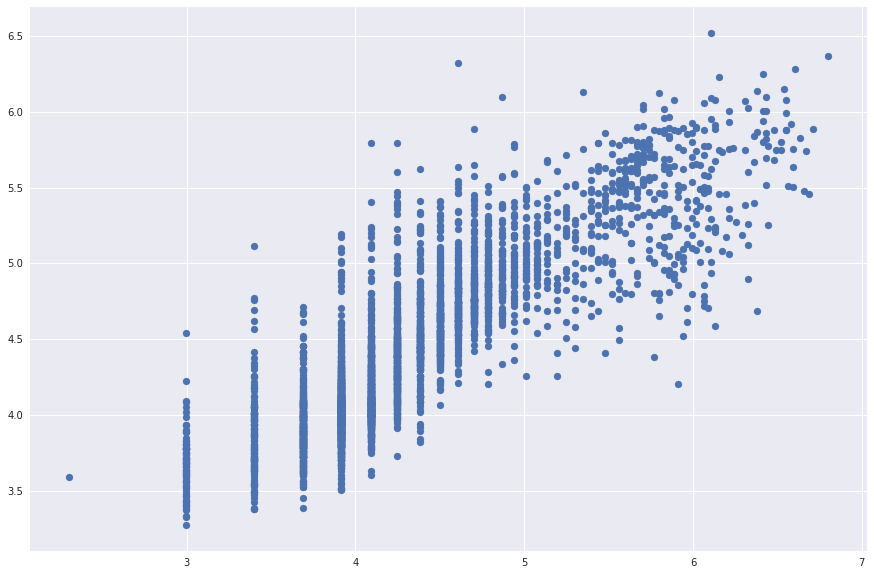

In [135]:
plt.rcParams["figure.figsize"] = (15,10)
plt.scatter(x=np.log(y_test), y=np.log(y_pred))
plt.show()

Random Forest is not that bad, but overfitting.

### SVR

In [143]:
SVR_model = SVR()
parameters = {'kernel':['linear', 'rbf', 'poly','sigmoid'], 
              'C': [0.01, 0.1, 1, 10], 
              'epsilon': [0.01,0.1,1,10],
              }

grid = GridSearchCV(estimator=SVR_model, param_grid=parameters, cv = 5, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.10469742910772241
{'C': 10, 'epsilon': 10, 'kernel': 'rbf'}


In [66]:
SV_regr = SVR(epsilon= 10, C= 10, kernel= 'rbf')
SV_regr.fit(X_train, y_train)
predictions = SV_regr.predict(X_test)

print ('SVR Train Score: {}'.format(SV_regr.score(X_train, y_train)))
print ('SVR Test Score: {}'.format(SV_regr.score(X_test, y_test)))

SVR Train Score: 0.11991446205671828
SVR Test Score: 0.12498433136280053


### k-NN

In [41]:
knn_model = KNeighborsRegressor()
parameters = {'n_neighbors':[2,5,7], 
              'algorithm': ['ball_tree', 'kd_tree', 'brute'], 
              }

grid = GridSearchCV(estimator=knn_model, param_grid=parameters, cv = 5, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.5170014566999167
{'algorithm': 'ball_tree', 'n_neighbors': 2}


In [67]:
knn_regr = KNeighborsRegressor(algorithm='ball_tree', n_neighbors=2)
knn_regr.fit(X_train, y_train)
predictions = knn_regr.predict(X_test)

print('k-NN Train score : {:.3f}'.format(RF_reg.score(X_train, y_train)))
print('k-NN Test score: {:.3f}'.format(RF_reg.score(X_test, y_test)))

k-NN Train score : 0.945
k-NN Test score: 0.617


k-NN looks slightly better, but still overfitting.

### Gradient Boosting Regressor

In [148]:
param_grid = {"n_estimators": [100, 250, 500, 750],
              'learning_rate': [0.08, 0.1, 0.2, 0.3, 1.0],
              'max_depth': [3, 5, 7, 9],
              'max_features':['auto', 5, 10],
              'min_samples_split': [2, 3]
             }

GB_model = GradientBoostingRegressor(random_state=5)
grid = GridSearchCV(estimator=GB_model, param_grid=param_grid, n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

0.5328465779241465
{'learning_rate': 0.1, 'max_depth': 9, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 750}


MSE: <function mean_squared_error at 0x7fde9cf44950>
________________
R square score: 0.5876396404350444


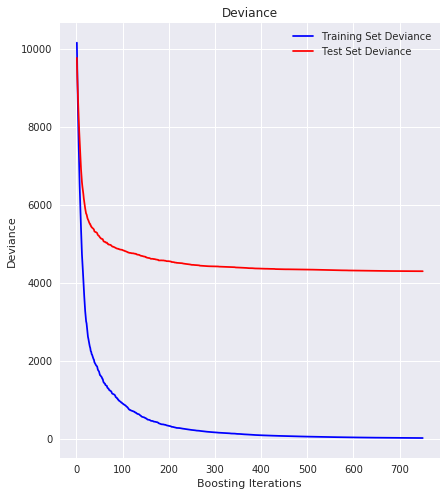

In [53]:
params = {'n_estimators': 750, 'max_depth': 9, 'min_samples_split': 2,
          'learning_rate': 0.1, 'random_state': 5, 'loss': 'ls'}

clf = GradientBoostingRegressor(**params).fit(X_train, y_train)
mean_squared_error(y_test, clf.predict(X_test))
print ('MSE: {}'.format(mean_squared_error))
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
print ('________________')
print ('R square score: {}'.format(clf.score(X_test, y_test)))

### AdaBoost

In [70]:
param_grid = {"n_estimators": [50, 100, 250, 500],
              "loss" : ['linear', 'square', 'exponential'],
              'learning_rate': [1.0, 1.5, 2.0]
             }

AB_model = AdaBoostRegressor(random_state=5)
grid = GridSearchCV(estimator=AB_model, param_grid=param_grid, n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

-1.554456813018962
{'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 50}


In [72]:
AB_regr = AdaBoostRegressor(learning_rate=1.0, loss='linear', n_estimators=50)
AB_regr.fit(X_train, y_train)

print('AdaBoost Train score : {:.3f}'.format(AB_regr.score(X_train, y_train)))
print('AdaBoost Test score: {:.3f}'.format(AB_regr.score(X_test, y_test)))

AdaBoost Train score : -0.546
AdaBoost Test score: -0.698


Boosting algorithms also not working fine.

## PCA

In [46]:
pca = PCA(svd_solver='auto')
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_comb_pca = np.concatenate((X_train_pca, X_test_pca), axis=0)

In [47]:
X_train_pca.shape


(15788, 18)

## ML Models with PCA

In [49]:
ridge = Ridge(alpha=.1,normalize=True)

ridge.fit(X_train_pca,y_train)

ridge.score(X_test,y_test)

-1.5521033298420788

In [51]:
elastic = ElasticNet()

elastic.fit(X_train_pca,y_train)

elastic.score(X_test,y_test)

-0.037746159043446026

In [52]:
param_grid = {"n_estimators": [50, 200, 500],
            "max_features": [3, 5, 10, 15],
            "min_samples_leaf": [1, 3, 5],
            'random_state': [5]}
model = RandomForestRegressor()
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv = 5)
grid.fit(X_train_pca, y_train)

print(grid.best_score_)
print(grid.best_params_)

0.49003856112167543
{'max_features': 10, 'min_samples_leaf': 1, 'n_estimators': 500, 'random_state': 5}


In [68]:
RF_reg = RandomForestRegressor(random_state=5, n_estimators=500, max_features=3, 
                                  min_samples_leaf=1)
RF_reg.fit(X_train_pca, y_train)

print('Train score : {:.3f}'.format(RF_reg.score(X_train_pca, y_train)))
print('Test score: {:.3f}'.format(RF_reg.score(X_test, y_test)))

Train score : 0.934
Test score: -2.203


PCA is not increasing the performances of the models.

### Heteroskedasticity and Autocorrelation of the Models

In [56]:
from statsmodels.stats.stattools import jarque_bera
from statsmodels import regression, stats
import statsmodels.api as sms
import statsmodels.stats.diagnostic as smd

        
def model_fit_and_test(X_train,y_train,X_test,y_test):
    def bulid_model(model_name):
        model = model_name()
        return model
    for model_name in [LinearRegression, Ridge, Lasso, ElasticNet, KNeighborsRegressor, DecisionTreeRegressor,
                       SVR, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor]:
    #for model_name in [LinearRegression, ElasticNet]:
        model = bulid_model(model_name)
        model.fit(X_train, y_train)
        print ('--------------------------')
        print(model_name)
        resid = model.predict(X_test) - y_test
        #print resid
        print ('--------------------------')
        print("Residual sum of squares: %f"% np.mean(resid ** 2))
        #print model.predict(TestX)
        #print TestY
        # Explained variance score: 1 is perfect prediction
        plt.scatter(model.predict(X_test), resid);
        plt.axhline(0, color='red')
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        #plt.xlim([1, 50])
        plt.show()
        print ('--------------------------')
        print('R squared: %.2f' % model.score(X_test, y_test))

       
        _, pvalue, _, _ = jarque_bera(resid)
        print ("Test Residuals Normal", pvalue)

        # xs_with_constant = sms.add_constant(np.column_stack((X1,X2,X3,X4)))
        xs_with_constant = sms.add_constant(X_test)
        _, pvalue1, _, _ = stats.diagnostic.het_breushpagan(resid, xs_with_constant)
        print ("Test Heteroskedasticity", pvalue1)
        ljung_box = smd.acorr_ljungbox(resid, lags=10)

        #print "Lagrange Multiplier Statistics:", ljung_box[0]
        print ("Test Autocorrelation P-values:", ljung_box[1])
        if any(ljung_box[1] < 0.05):
            print ("The residuals are autocorrelated.")
        else:
            print ("The residuals are not autocorrelated.") 

--------------------------
<class 'sklearn.linear_model.base.LinearRegression'>
--------------------------
Residual sum of squares: 8889.393868


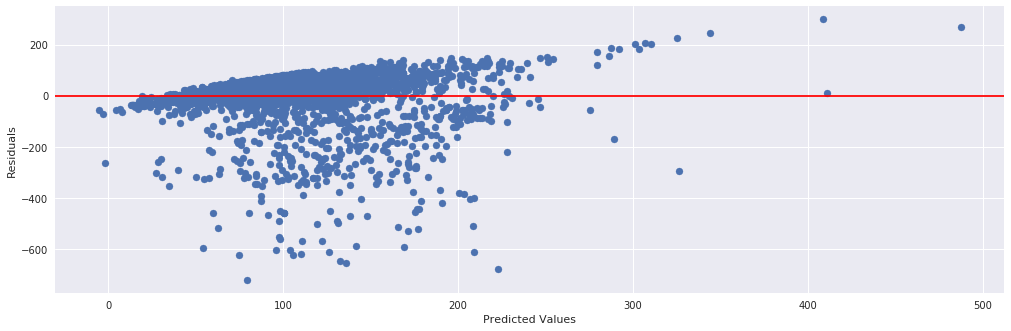

--------------------------
R squared: 0.15
Test Residuals Normal 0.0
Test Heteroskedasticity 7.882386652922965e-22
Test Autocorrelation P-values: [0.58192373 0.85101629 0.92056766 0.92022729 0.65174094 0.71920925
 0.80413858 0.82739312 0.88473166 0.90211599]
The residuals are not autocorrelated.
--------------------------
<class 'sklearn.linear_model.ridge.Ridge'>
--------------------------
Residual sum of squares: 8889.299043


/home/muzo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')


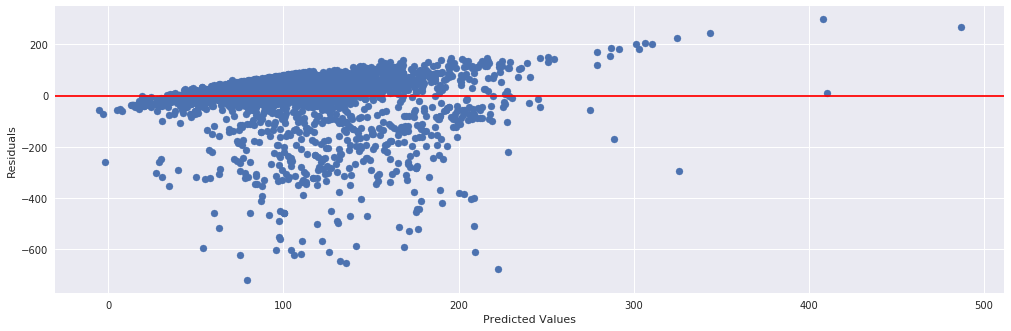

--------------------------
R squared: 0.15
Test Residuals Normal 0.0
Test Heteroskedasticity 8.09551626283746e-22
Test Autocorrelation P-values: [0.58218413 0.85119715 0.92073208 0.92041722 0.65201826 0.71950817
 0.804368   0.82752134 0.88485419 0.90220404]
The residuals are not autocorrelated.
--------------------------
<class 'sklearn.linear_model.coordinate_descent.Lasso'>
--------------------------
Residual sum of squares: 9049.539018


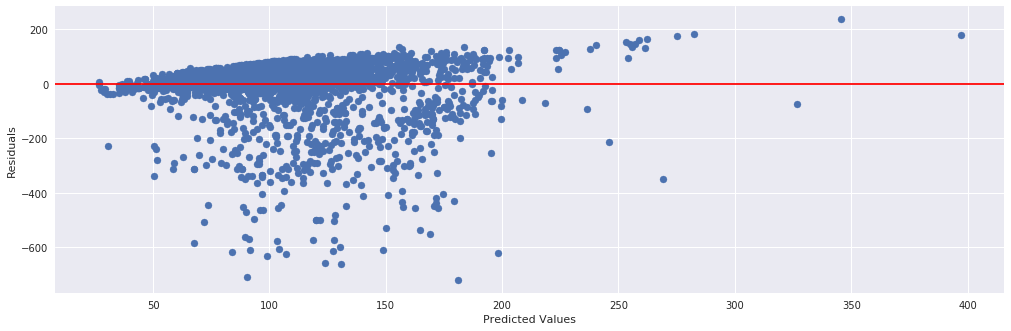

--------------------------
R squared: 0.13
Test Residuals Normal 0.0
Test Heteroskedasticity 3.511746501225289e-22
Test Autocorrelation P-values: [0.61463552 0.86363159 0.93218837 0.94914849 0.72787961 0.8143979
 0.86766004 0.88150742 0.92874776 0.93376828]
The residuals are not autocorrelated.
--------------------------
<class 'sklearn.linear_model.coordinate_descent.ElasticNet'>
--------------------------
Residual sum of squares: 9631.804855


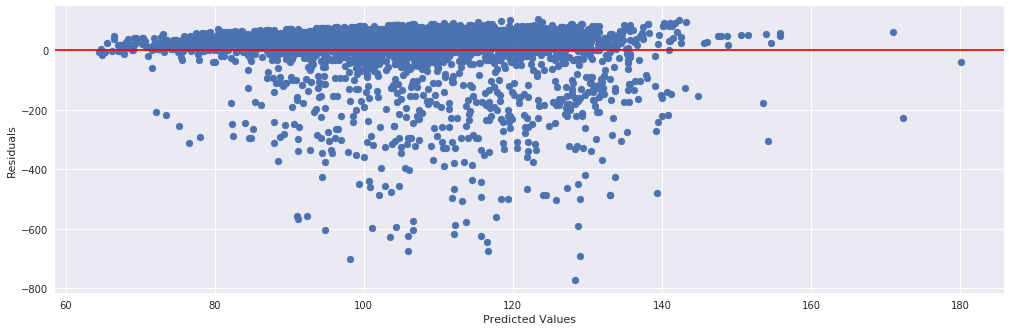

--------------------------
R squared: 0.08
Test Residuals Normal 0.0
Test Heteroskedasticity 1.80063095743216e-24
Test Autocorrelation P-values: [0.48232301 0.77900408 0.87167509 0.93695537 0.86789358 0.92166835
 0.8693258  0.84982174 0.90560039 0.84173653]
The residuals are not autocorrelated.
--------------------------
<class 'sklearn.neighbors.regression.KNeighborsRegressor'>
--------------------------
Residual sum of squares: 5189.558652


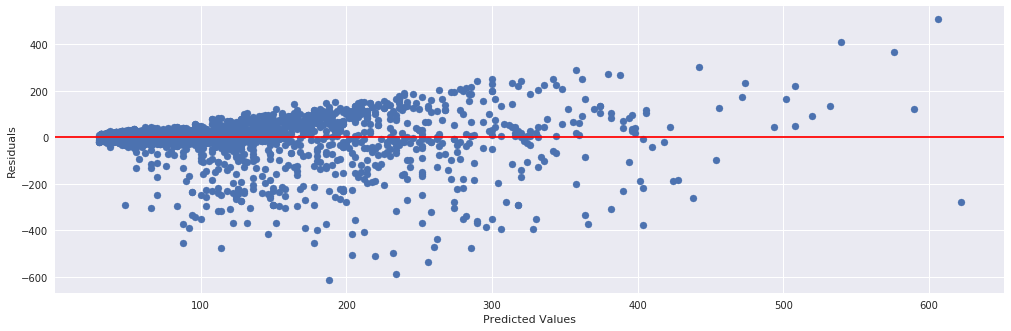

--------------------------
R squared: 0.50
Test Residuals Normal 0.0
Test Heteroskedasticity 7.924015020335903e-20
Test Autocorrelation P-values: [0.68662301 0.8561003  0.92966865 0.94070339 0.93523261 0.95377366
 0.97686911 0.96366548 0.97602497 0.7762348 ]
The residuals are not autocorrelated.
--------------------------
<class 'sklearn.tree.tree.DecisionTreeRegressor'>
--------------------------
Residual sum of squares: 8192.044591


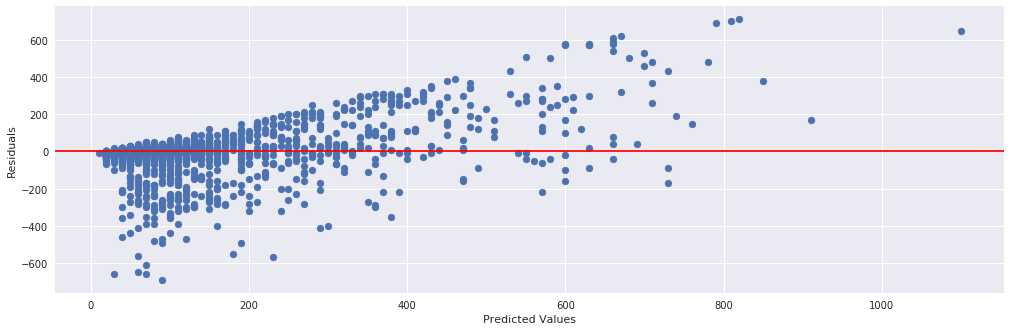

--------------------------
R squared: 0.21
Test Residuals Normal 0.0
Test Heteroskedasticity 2.013470898815325e-24
Test Autocorrelation P-values: [0.40311989 0.37879952 0.57451073 0.72727387 0.72992146 0.72917955
 0.81805626 0.48851584 0.58487304 0.67071755]
The residuals are not autocorrelated.
--------------------------
<class 'sklearn.svm.classes.SVR'>
--------------------------
Residual sum of squares: 10128.969206


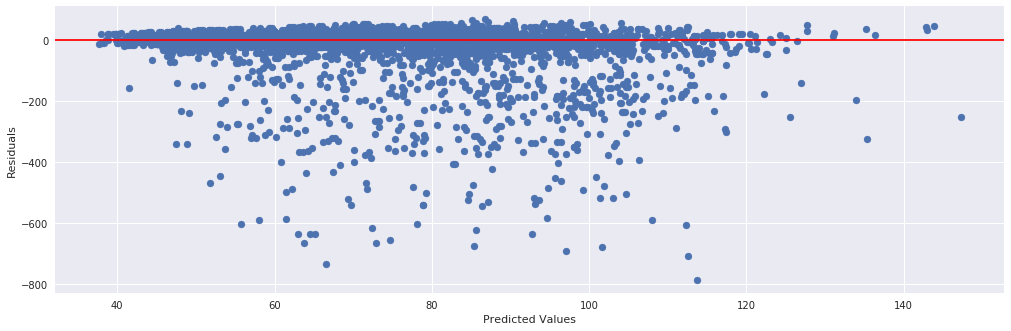

--------------------------
R squared: 0.03
Test Residuals Normal 0.0
Test Heteroskedasticity 2.8468514433366477e-27
Test Autocorrelation P-values: [0.49896641 0.77827341 0.78685468 0.87498013 0.79461527 0.86902962
 0.85954407 0.8047477  0.8688236  0.81552112]
The residuals are not autocorrelated.
--------------------------
<class 'sklearn.ensemble.forest.RandomForestRegressor'>
--------------------------
Residual sum of squares: 4701.561186


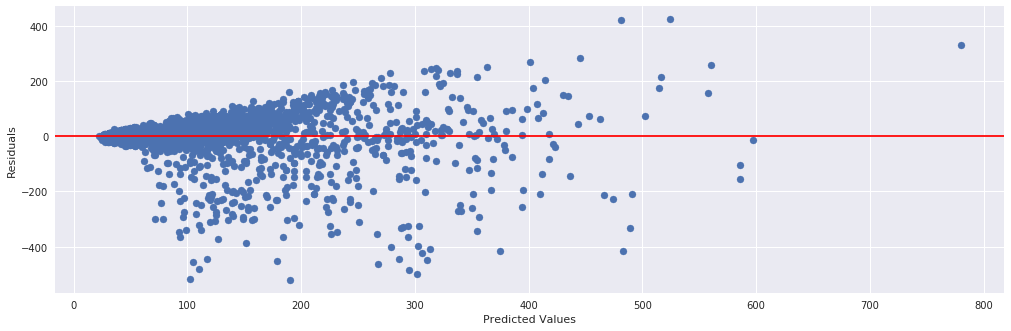

--------------------------
R squared: 0.55
Test Residuals Normal 0.0
Test Heteroskedasticity 9.599456100428553e-23
Test Autocorrelation P-values: [0.71735258 0.93612743 0.91946144 0.89464773 0.94178826 0.92089089
 0.91782896 0.93067976 0.9604739  0.94071101]
The residuals are not autocorrelated.


/home/muzo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')


--------------------------
<class 'sklearn.ensemble.weight_boosting.AdaBoostRegressor'>
--------------------------
Residual sum of squares: 17326.693666


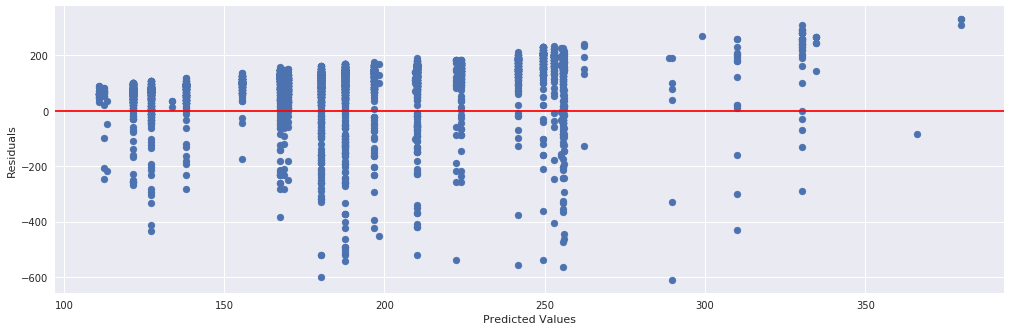

--------------------------
R squared: -0.66
Test Residuals Normal 0.0
Test Heteroskedasticity 3.6258857281118448e-37
Test Autocorrelation P-values: [0.54065272 0.74136703 0.89537203 0.94603699 0.90060687 0.94610301
 0.95026284 0.93773947 0.9641391  0.92122134]
The residuals are not autocorrelated.


/home/muzo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')


--------------------------
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
--------------------------
Residual sum of squares: 7752.926956


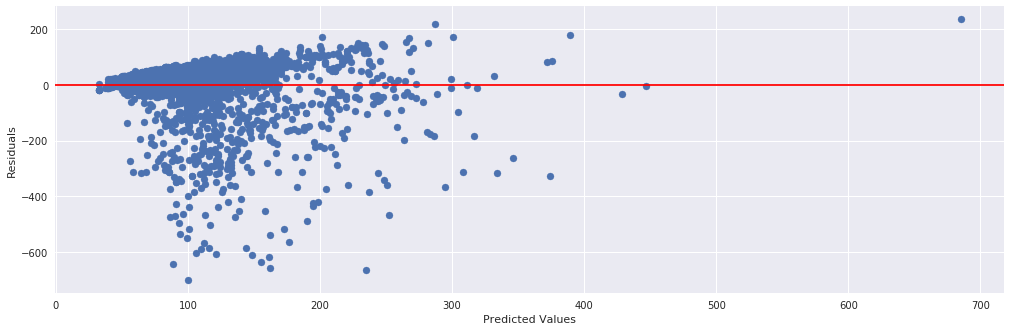

--------------------------
R squared: 0.26
Test Residuals Normal 0.0
Test Heteroskedasticity 1.1524568302041742e-16
Test Autocorrelation P-values: [0.36879699 0.66765533 0.80499368 0.87428559 0.54656925 0.5540798
 0.64866874 0.70178178 0.78117774 0.74070208]
The residuals are not autocorrelated.


In [57]:
model_fit_and_test(X_train, y_train, X_test, y_test)

### H2O

In [75]:
import h2o
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator
h2o.init(nthreads=-1)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_181"; OpenJDK Runtime Environment (build 1.8.0_181-8u181-b13-1ubuntu0.18.10.1-b13); OpenJDK 64-Bit Server VM (build 25.181-b13, mixed mode)
  Starting server from /home/muzo/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_hivgif8
  JVM stdout: /tmp/tmp_hivgif8/h2o_muzo_started_from_python.out
  JVM stderr: /tmp/tmp_hivgif8/h2o_muzo_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.8
H2O cluster version age:,1 month and 14 days
H2O cluster name:,H2O_from_python_muzo_esoqtw
H2O cluster total nodes:,1
H2O cluster free memory:,1.665 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [76]:
df_h = h2o.import_file("data.csv")
df_h.head(5)

Parse progress: |█████████████████████████████████████████████████████████| 100%


date,TotalConsmp,R1,H_1,R2,H_2,R3,H_3,R4,H_4,R5,H_5,R6,H_6,R7,H_7,R8,H_8,R9,H_9,TempOutSide,Press_mm_hg,H_OutSide,Windspeed,Visibility
1/11/2016 17:00,90,19.89,47.5967,19.2,44.79,19.79,44.73,19,45.5667,17.1667,55.2,7.02667,84.2567,17.2,41.6267,18.2,48.9,17.0333,45.53,6.6,733.5,92,7,63
1/11/2016 17:10,90,19.89,46.6933,19.2,44.7225,19.79,44.79,19,45.9925,17.1667,55.2,6.83333,84.0633,17.2,41.56,18.2,48.8633,17.0667,45.56,6.48,733.6,92,6.66667,59.1667
1/11/2016 17:20,80,19.89,46.3,19.2,44.6267,19.79,44.9333,18.9267,45.89,17.1667,55.09,6.56,83.1567,17.2,41.4333,18.2,48.73,17,45.5,6.37,733.7,92,6.33333,55.3333
1/11/2016 17:30,90,19.89,46.0667,19.2,44.59,19.79,45,18.89,45.7233,17.1667,55.09,6.43333,83.4233,17.1333,41.29,18.1,48.59,17,45.4,6.25,733.8,92,6,51.5
1/11/2016 17:40,100,19.89,46.3333,19.2,44.53,19.79,45,18.89,45.53,17.2,55.09,6.36667,84.8933,17.2,41.23,18.1,48.59,17,45.4,6.13,733.9,92,5.66667,47.6667


In [78]:
df_h = df_h.drop('date', axis=1)

In [79]:
features = list(df_h.columns) # we want to use all the information
features.remove('TotalConsmp')    # we need to exclude the target 'price_total' (otherwise there is nothing to predict)
features

['R1',
 'H_1',
 'R2',
 'H_2',
 'R3',
 'H_3',
 'R4',
 'H_4',
 'R5',
 'H_5',
 'R6',
 'H_6',
 'R7',
 'H_7',
 'R8',
 'H_8',
 'R9',
 'H_9',
 'TempOutSide',
 'Press_mm_hg',
 'H_OutSide',
 'Windspeed',
 'Visibility']

### Train Test Split

In [80]:
#Split the H2O data frame into training/test sets
# so we can evaluate out-of-bag performance
df_h_split = df_h.split_frame(ratios = [0.8], seed = 1234)

df_h_split_train = df_h_split[0] # using 80% for training
df_h_split_test = df_h_split[1]  # using the rest 20% for out-of-bag evaluation

In [81]:
# Build a Deep Learning (Deep Neural Networks, DNN) model with default settings

# Import the function for DNN
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

# Set up DNN for regression
dnn_default = H2ODeepLearningEstimator(model_id = 'dnn_default')

# (not run) Change 'reproducible' to True if you want to reproduce the results
# The model will be built using a single thread (could be very slow)
# dnn_default = H2ODeepLearningEstimator(model_id = 'dnn_default', reproducible = True)

# Use .train() to build the model
dnn_default.train(x = features, 
                  y = 'TotalConsmp', 
                  training_frame = df_h_split_train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [82]:
dnn_default

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  dnn_default


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 12818.070460210385
RMSE: 113.21691772968555
MAE: 77.15378415595386
RMSLE: NaN
Mean Residual Deviance: 12818.070460210385
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
,2018-11-05 09:38:22,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan
,2018-11-05 09:38:26,4.327 sec,4436 obs/sec,1.0,1,15875.0,116.3402969,13535.0646864,76.9347478,-0.2730278
,2018-11-05 09:38:32,10.254 sec,6864 obs/sec,4.0,4,63500.0,113.2169177,12818.0704602,77.1537842,-0.2055916
,2018-11-05 09:38:38,16.339 sec,8437 obs/sec,8.0,8,127000.0,126.5524733,16015.5284952,90.5119988,-0.5063255
,2018-11-05 09:38:41,19.483 sec,8841 obs/sec,10.0,10,158750.0,120.2592416,14462.2852001,86.3821150,-0.3602366
,2018-11-05 09:38:41,19.778 sec,8837 obs/sec,10.0,10,158750.0,113.2169177,12818.0704602,77.1537842,-0.2055916


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
R8,1.0,1.0,0.0504833
H_5,0.9921539,0.9921539,0.0500872
H_1,0.9806368,0.9806368,0.0495058
H_2,0.9416834,0.9416834,0.0475393
TempOutSide,0.9375460,0.9375460,0.0473305
---,---,---,---
R5,0.7782506,0.7782506,0.0392887
Press_mm_hg,0.7655977,0.7655977,0.0386499
H_6,0.7635737,0.7635737,0.0385478
H_7,0.7612419,0.7612419,0.0384300



See the whole table with table.as_data_frame()


In [83]:
# Check the model performance on test dataset
dnn_default.model_performance(df_h_split_test)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 12821.193213460741
RMSE: 113.23070790850308
MAE: 77.69577802499083
RMSLE: NaN
Mean Residual Deviance: 12821.193213460741


In [84]:
score_h2o = dnn_default.model_performance(df_h_split_test).r2()
print(dnn_default.model_performance(df_h_split_test).r2())

-0.17626265273530972


## AUTO ML

In [ ]:
from auto_ml import Predictor
#from catboost import CatBoostRegressor
import pickle

df1 = data.drop(['date', 'weekday','DayNightConsumption'], axis=1)

column_descriptions = {
  'TotalConsmp': 'output', 'R1': 'categorical', 'H_1': 'categorical', 
    'R2': 'categorical', 'H_2': 'categorical', 'R3': 'categorical', 
    'H_3': 'categorical', 'R4':'categorical','H_4':'categorical' , 
    'R5':'categorical','H_5':'categorical', 'R7':'categorical','H_7':'categorical',
    'R8':'categorical','H_8':'categorical', 'R9':'categorical','H_9':'categorical'
}

ml_predictor = Predictor(type_of_estimator='regressor', column_descriptions=column_descriptions)

print ('training started>> ')
    
ml_predictor.train(df1, model_names='GradientBoostingRegressor', cv=5)
    
score = r2_score(df1.TotalConsmp, ml_predictor.predict(df1))

print ('score is {}'.format(round(score,4)))
    
filename = './full_model/GB_model_{}.ml'.format(score)
    
pickle.dump(ml_predictor, open(filename, 'wb'))

## Conclusion

Overall model scores are listed below.

<TABLE>
<TR> <TH style="text-align:center;"> Model Name <TH style="text-align:center;"> Train <TH style="text-align:center;"> Test
<TR> <TD style="text-align:center;"> Linear Regression <TD style="text-align:center;"> 0.144  <TD style="text-align:center;"> 0.147
<TR> <TD style="text-align:center;"> Ridge <TD style="text-align:center;"> 0.117  <TD style="text-align:center;"> 0.122
<TR> <TD style="text-align:center;"> Lasso <TD style="text-align:center;"> 0.006  <TD style="text-align:center;"> 0.006
<TR> <TD style="text-align:center;"> Elastic Net <TD style="text-align:center;"> 0.071  <TD style="text-align:center;"> 0.076
<TR> <TD style="text-align:center;"> Support Vector Machine <TD style="text-align:center;"> 0.119  <TD style="text-align:center;"> 0.125
<TR> <TD style="text-align:center;"> k-NN <TD style="text-align:center;"> 0.866  <TD style="text-align:center;"> 0.623
<TR> <TD style="text-align:center;"> Random Forest <TD style="text-align:center;"> 0.945  <TD style="text-align:center;"> 0.617
<TR> <TD style="text-align:center;"> Gradient Boosting <TD style="text-align:center;"> 0.532  <TD style="text-align:center;"> 0.587
<TR> <TD style="text-align:center;"> AdaBoost <TD style="text-align:center;"> -0.546  <TD style="text-align:center;"> -0.698


</TABLE>

As partly mentioned above, dataset is not fitting well with **linear algorithms**. 

**Random Forest** is performing slightly better but **overfitting**. 

**PCA** is not successful at all.

**k-NN** looks like the best model among all the ones listed here.

I tried **Auto ML** and  **H2O** with neural network but they also didn't provide good scores as well.

I'd like to try some genetic algorithms as well. Unfortunately I don't have enough time (need at least 1 day for running TPOT).
